In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import random
import os
import torch.random
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!/Users/nataliaiakubenko/opt/anaconda3/bin/python3 -m pip install scikit-plot

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
#!/Users/nataliaiakubenko/opt/anaconda3/bin/python3 -m pip install lightgbm==2.0.10

In [5]:
#import lightgbm

In [6]:
def seed_everything(seed=7575):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.random.manual_seed(seed)

seed_everything()

In [7]:
train = pd.read_excel("Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx", index_col='Параметр')
test = pd.read_excel("Задача 1. Датасет 1. Тренировочный размеченный.xlsx", index_col='Параметр')

In [8]:
pd_train = train.copy()
pd_test = test.copy()

pd_test['target'] = 0


In [9]:
data = pd.merge(left=pd_train, right=pd_test[['target']], left_on=pd_train.index, right_on=pd_test.index, how='left')
data.fillna(1, inplace=True)
data.set_index('key_0', inplace=True)

In [143]:
def get_sleep_index(df: pd.DataFrame, time_col: str)->any:
    '''
    time_col - название колонки где ts
    '''
        df = df.rename(columns={time_col: 'time_col'})
        df = df[['time_col']]
        df2 = df[1:]
        df2.reset_index(inplace=True)
        df2 = df2.drop(columns =['index'])
        df2 =df2.rename(columns ={'time_col':'time_col_next'})
        df4 = pd.concat([df,df2], axis=1)

        df4['delta']= df4.apply(lambda df: df.time_col_next - df.time_col, axis=1)

        df4.loc[:,'delta_min']= df4.loc[:,'delta'].apply(lambda x: x.total_seconds() / 60)
        index0 = [i for i in list(tmp3[tmp3['delta_min']>10].index)]
        index1 = [i+1 for i in list(tmp3[tmp3['delta_min']>10].index)]
        index2 = [i-1 for i in list(tmp3[tmp3['delta_min']>10].index)]
        index_to_del =index0+index1+index2
        print('delete ',len(index_to_del))
        return index_to_del

In [144]:
indxs = get_sleep_index(df= data,time_col='timest')

delete  93


In [148]:
data.loc[indxs,'pred'] =1

data['pred'].fillna(0, inplace =True)

In [149]:
print(classification_report(data['target'],data['pred']))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     36816
         1.0       0.40      0.07      0.12       523

    accuracy                           0.99     37339
   macro avg       0.70      0.53      0.56     37339
weighted avg       0.98      0.99      0.98     37339



In [216]:

import seaborn as sns
import matplotlib.pyplot as plt

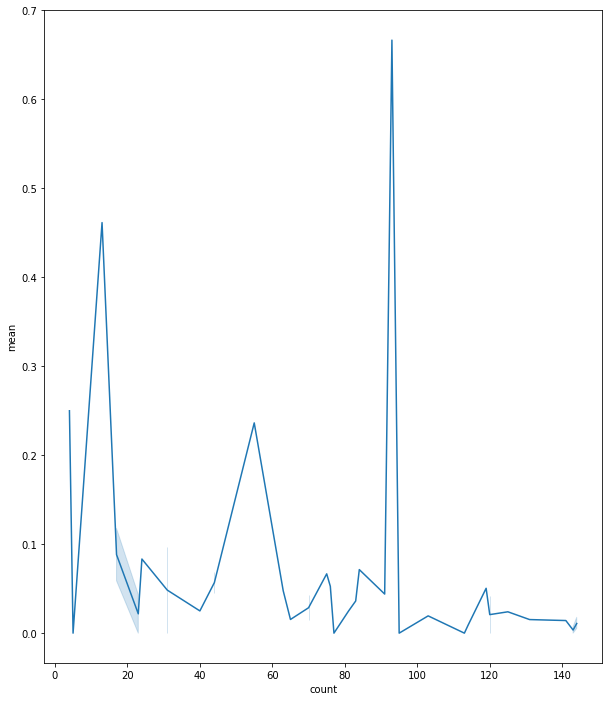

In [218]:
plt.figure(figsize=(10, 12))
#sns.lineplot(data=data_1, x="Маркер", y="х034")
sns.lineplot(data=df33, y="mean", x="count")


In [214]:
df33

,,count,mean
0,2021-03-24,63,0.047619
1,2021-03-25,144,0.013889
2,2021-03-26,144,0.006944
3,2021-03-27,144,0.020833
4,2021-03-28,144,0.000000
...,...,...,...
275,2022-03-18,144,0.000000
276,2022-03-19,144,0.000000
277,2022-03-20,144,0.000000
278,2022-03-21,144,0.000000
